<a href="https://colab.research.google.com/github/swetha4444/Artificial-Intelligence/blob/master/AI_assign_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Point and Polygon Classes

In [39]:
# point class with x, y as point 
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

class point:
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y
    
    def __str__(self):
        string = "("+str(self.x)+","+str(self.y)+")"
        return string

class polygon:
    def __init__(self, points): #points - array
        self.points = points

    

# Convex Hull Formation


In [40]:
def Left_index(points): 

	minn = 0
	for i in range(1,len(points)): 
		if points[i].x < points[minn].x: 
			minn = i 
		elif points[i].x == points[minn].x: 
			if points[i].y > points[minn].y: 
				minn = i 
	return minn 

def orientation(p, q, r): 

	val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y) 

	if val == 0: 
		return 0
	elif val > 0: 
		return 1
	else: 
		return 2

def convexHull(points, n): 
	
	# There must be at least 3 points 
	if n < 3: 
		return

	# Find the leftmost point 
	l = Left_index(points) 

	hull = [] 

	p = l 
	q = 0
	while(True): 
		
		# Add current point to result 
		hull.append(p) 

		q = (p + 1) % n 

		for i in range(n): 
			
			# If i is more counterclockwise 
			# than current q, then update q 
			if(orientation(points[p], 
				points[i], points[q]) == 2): 
				q = i 

		p = q 

		# While we don't come to first point 
		if(p == l): 
			break

	# Print Result
	x = []
	y = []
	pts =[]
	for each in hull:
		pts.append(points[each])
		x.append(points[each].x)
		y.append(points[each].y)
	return x,y,pts


# Path to Goal

In [57]:
class solver:

    def __init__(self, max_x, max_y, polygons, start: point, goal: point):
        self.actions = ["u", "d", "l", "r"]
        self.max_x = max_x
        self.max_y = max_y
        self.polygons = polygons
        self.start = start
        self.goal = goal
        self.path = [[start.x,start.y]] #visited
    
    def isGoal(self,pt) -> bool:
        return ((pt.x == goal.x) and (pt.y == goal.y))

    def inside(self,pt):
        x = pt.x
        y = pt.y
        flag = False
        for polygon in self.polygons:
          points = []
          for p in polygon.points:
            points.append([p.x,p.y])
          flag = (Point(x,y).within(Polygon(points)))
          if (flag == True):
            return flag
        return flag

    def h_x(self,pt):
      x = pt.x
      y = pt.y
      g_x = goal.x
      g_y = goal.y
      return (abs(x - g_x) + abs(y - g_y))
    

    def move_up(self,spt):
        pt = point(spt.x,spt.y+1)
        return pt

    
    def move_down(self,spt):
        pt = point(spt.x,spt.y-1)
        return pt


    def move_left(self,spt):
        pt = point(spt.x-1,spt.y)
        return pt

    
    def move_right(self,spt):
        pt = point(spt.x+1,spt.y)
        return pt

    def get_action(self,pt):
        heu = []
        heu.append(self.h_x(self.move_up(pt)))
        heu.append(self.h_x(self.move_down(pt)))
        heu.append(self.h_x(self.move_left(pt)))
        heu.append(self.h_x(self.move_right(pt)))
        i = heu.index(min(heu))
        while(len(heu)!=0):
          #upt-updated point
          i = heu.index(min(heu))
          if (i == 0):
            upt = self.move_up(pt)
            if ((self.inside(upt) == True) or (upt.x > max_x or upt.x <0) or (upt.y > max_y or upt.y <0) or ([upt.x,upt.y] in self.path)):
              heu[0] = 100
            else:
              print("UP",upt)
              break
          elif (i == 1):
            upt = self.move_down(pt)
            if ((self.inside(upt) == True) or (upt.x > max_x or upt.x <0) or (upt.y > max_y or upt.y <0) or ([upt.x,upt.y] in self.path)):
              heu[1] = 100
            else:
              print("DOWN",upt)
              break
          elif (i == 2):
            upt = self.move_left(pt)
            if ((self.inside(upt) == True) or (upt.x > max_x or upt.x <0) or (upt.y > max_y or upt.y <0) or ([upt.x,upt.y] in self.path)):
              heu[2] = 100
            else:
              print("LEFT",upt)
              break
          elif (i == 3):
            upt = self.move_right(pt)
            if ((self.inside(upt) == True) or (upt.x > max_x or upt.x <0) or (upt.y > max_y or upt.y <0) or ([upt.x,upt.y] in self.path)):
              heu[3] = 100
            else:
              print("RIGHT",upt)
              break
        return upt
          

    def bfs(self):
      curr_pos = start
      i=0
      while((self.isGoal(curr_pos) != True) and (i!=100) ):
        curr_pos = self.get_action(curr_pos)
        self.path.append([curr_pos.x,curr_pos.y])
        i+=1




#Running the Code




		GREEDY BFS


Start State:  (0,8)
Goal State:  (4,4)
Actions:  ['u', 'd', 'l', 'r']


	PATH:

DOWN (0,7)
DOWN (0,6)
DOWN (0,5)
DOWN (0,4)
RIGHT (1,4)
UP (1,5)
RIGHT (2,5)
RIGHT (3,5)
DOWN (3,4)
RIGHT (4,4)



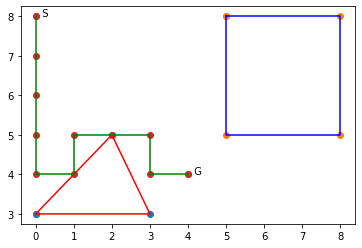

In [64]:
#Creating Polygons
polygons = []

points = [] 
points.append(point(0, 3)) 
points.append(point(2, 5)) 
points.append(point(3, 3)) 
x,y,points = convexHull(points, len(points))
polygons.append(polygon(points))
x.append(x[0])
y.append(y[0])
plt.scatter(x,y)
plt.plot(x,y,'r')

points = []
points.append(point(8, 8)) 
points.append(point(5, 8)) 
points.append(point(8, 5)) 
points.append(point(5, 5)) 
x,y,points = convexHull(points, len(points))
polygons.append(polygon(points))
x.append(x[0])
y.append(y[0])
plt.scatter(x,y)
plt.plot(x,y,'b')


#Starting and Goal States
start = point(0,8)
goal = point(4,4)
plt.scatter([start.x,goal.x],[start.y,goal.y])
plt.annotate("  S",(start.x,start.y))
plt.annotate("  G",(goal.x,goal.y))


#Solving using Greedy BFS
max_x,max_y = 20,20
print("\n\n\t\tGREEDY BFS\n\n");
print("Start State: ",g.start);
print("Goal State: ",g.goal);
print("Actions: ",g.actions);
print("\n\n\tPATH:\n")
g = solver(max_x, max_y, polygons, start, goal)
g.bfs()

x=[]
y=[]

for pt in g.path:
  x.append(pt[0])
  y.append(pt[1])

plt.scatter(x,y)
plt.plot(x,y,'g')

#printing plot
print()
plt.show()



